### Machine Learning Workflow for supervised learning

###### Data Set -> Data Pre-processing -> Data Analysis -> Train Test Split -> Feed to various models -> evaluation  

### Supervised Learning (Regression) Task on Boston Housing Dataset
https://www.openml.org/search?type=data&status=active&id=43465

##### Problem Statement
Create a predictive model to estimate the median value of owner-occupied homes in the Boston area using a variety of features, including crime rate, education (pupil-teacher ratio), accessibility to employment centers (average commuting distance), and socioeconomic factors (percent of lower-status population). This model enables potential buyers and sellers to make informed decisions when entering the housing market and helps policymakers identify areas for improvement within the urban landscape.

In [1]:
#importing the necessary libraries 
#Pre Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings #to avoid memory leak warning in jupyter
warnings.filterwarnings('ignore')


#Regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score




In [2]:
dataset = pd.read_csv("boston.csv")

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Changing the name of the column from MEDV to Price 
dataset = dataset.rename(columns={'MEDV': 'Price'})

In [5]:
#checking the keys of the dataset
dataset.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

### Data Analysis


In [6]:
dataset.info()

#checking if the counts are the same and seeing the information.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#Sumamry of the dataset

dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see that ZN has 0.00 value until the upper quartile, while CHAS is a binary which has 0 all the way and some 1 values. 

These can affect and skew the results of the model so we will have to drop them from the dataset.




In [8]:
dataset = dataset.drop(columns=["ZN","CHAS"])


In [9]:
dataset.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Next, we will use to check if there are any missing values in the dataframe. If there are missing values, we will have to conduct imputation such as using "mean" for missing values in a numerical column and "most frequently appeared" or the mode for a categorical column. 

In [10]:
#Checking the missing values 
dataset.isnull()

#since some values in the middle may not be shown, we is .sum() to see if there
#is any missing at all.
dataset.isnull().sum()

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
#Exploratory Data Analysis
#Correlation (to see how independent and target features are correlated.)

dataset.corr()
#correlation matrix using pandas
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#ensure that there is no correlation and make sure there is no multicollinearity

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.00,0.41,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
INDUS,0.41,1.00,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
NOX,0.42,0.76,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,-0.39,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,0.64,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,-0.71,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,0.60,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,0.72,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47
PTRATIO,0.29,0.38,0.19,-0.36,0.26,-0.23,0.46,0.46,1.00,-0.18,0.37,-0.51
B,-0.39,-0.36,-0.38,0.13,-0.27,0.29,-0.44,-0.44,-0.18,1.00,-0.37,0.33


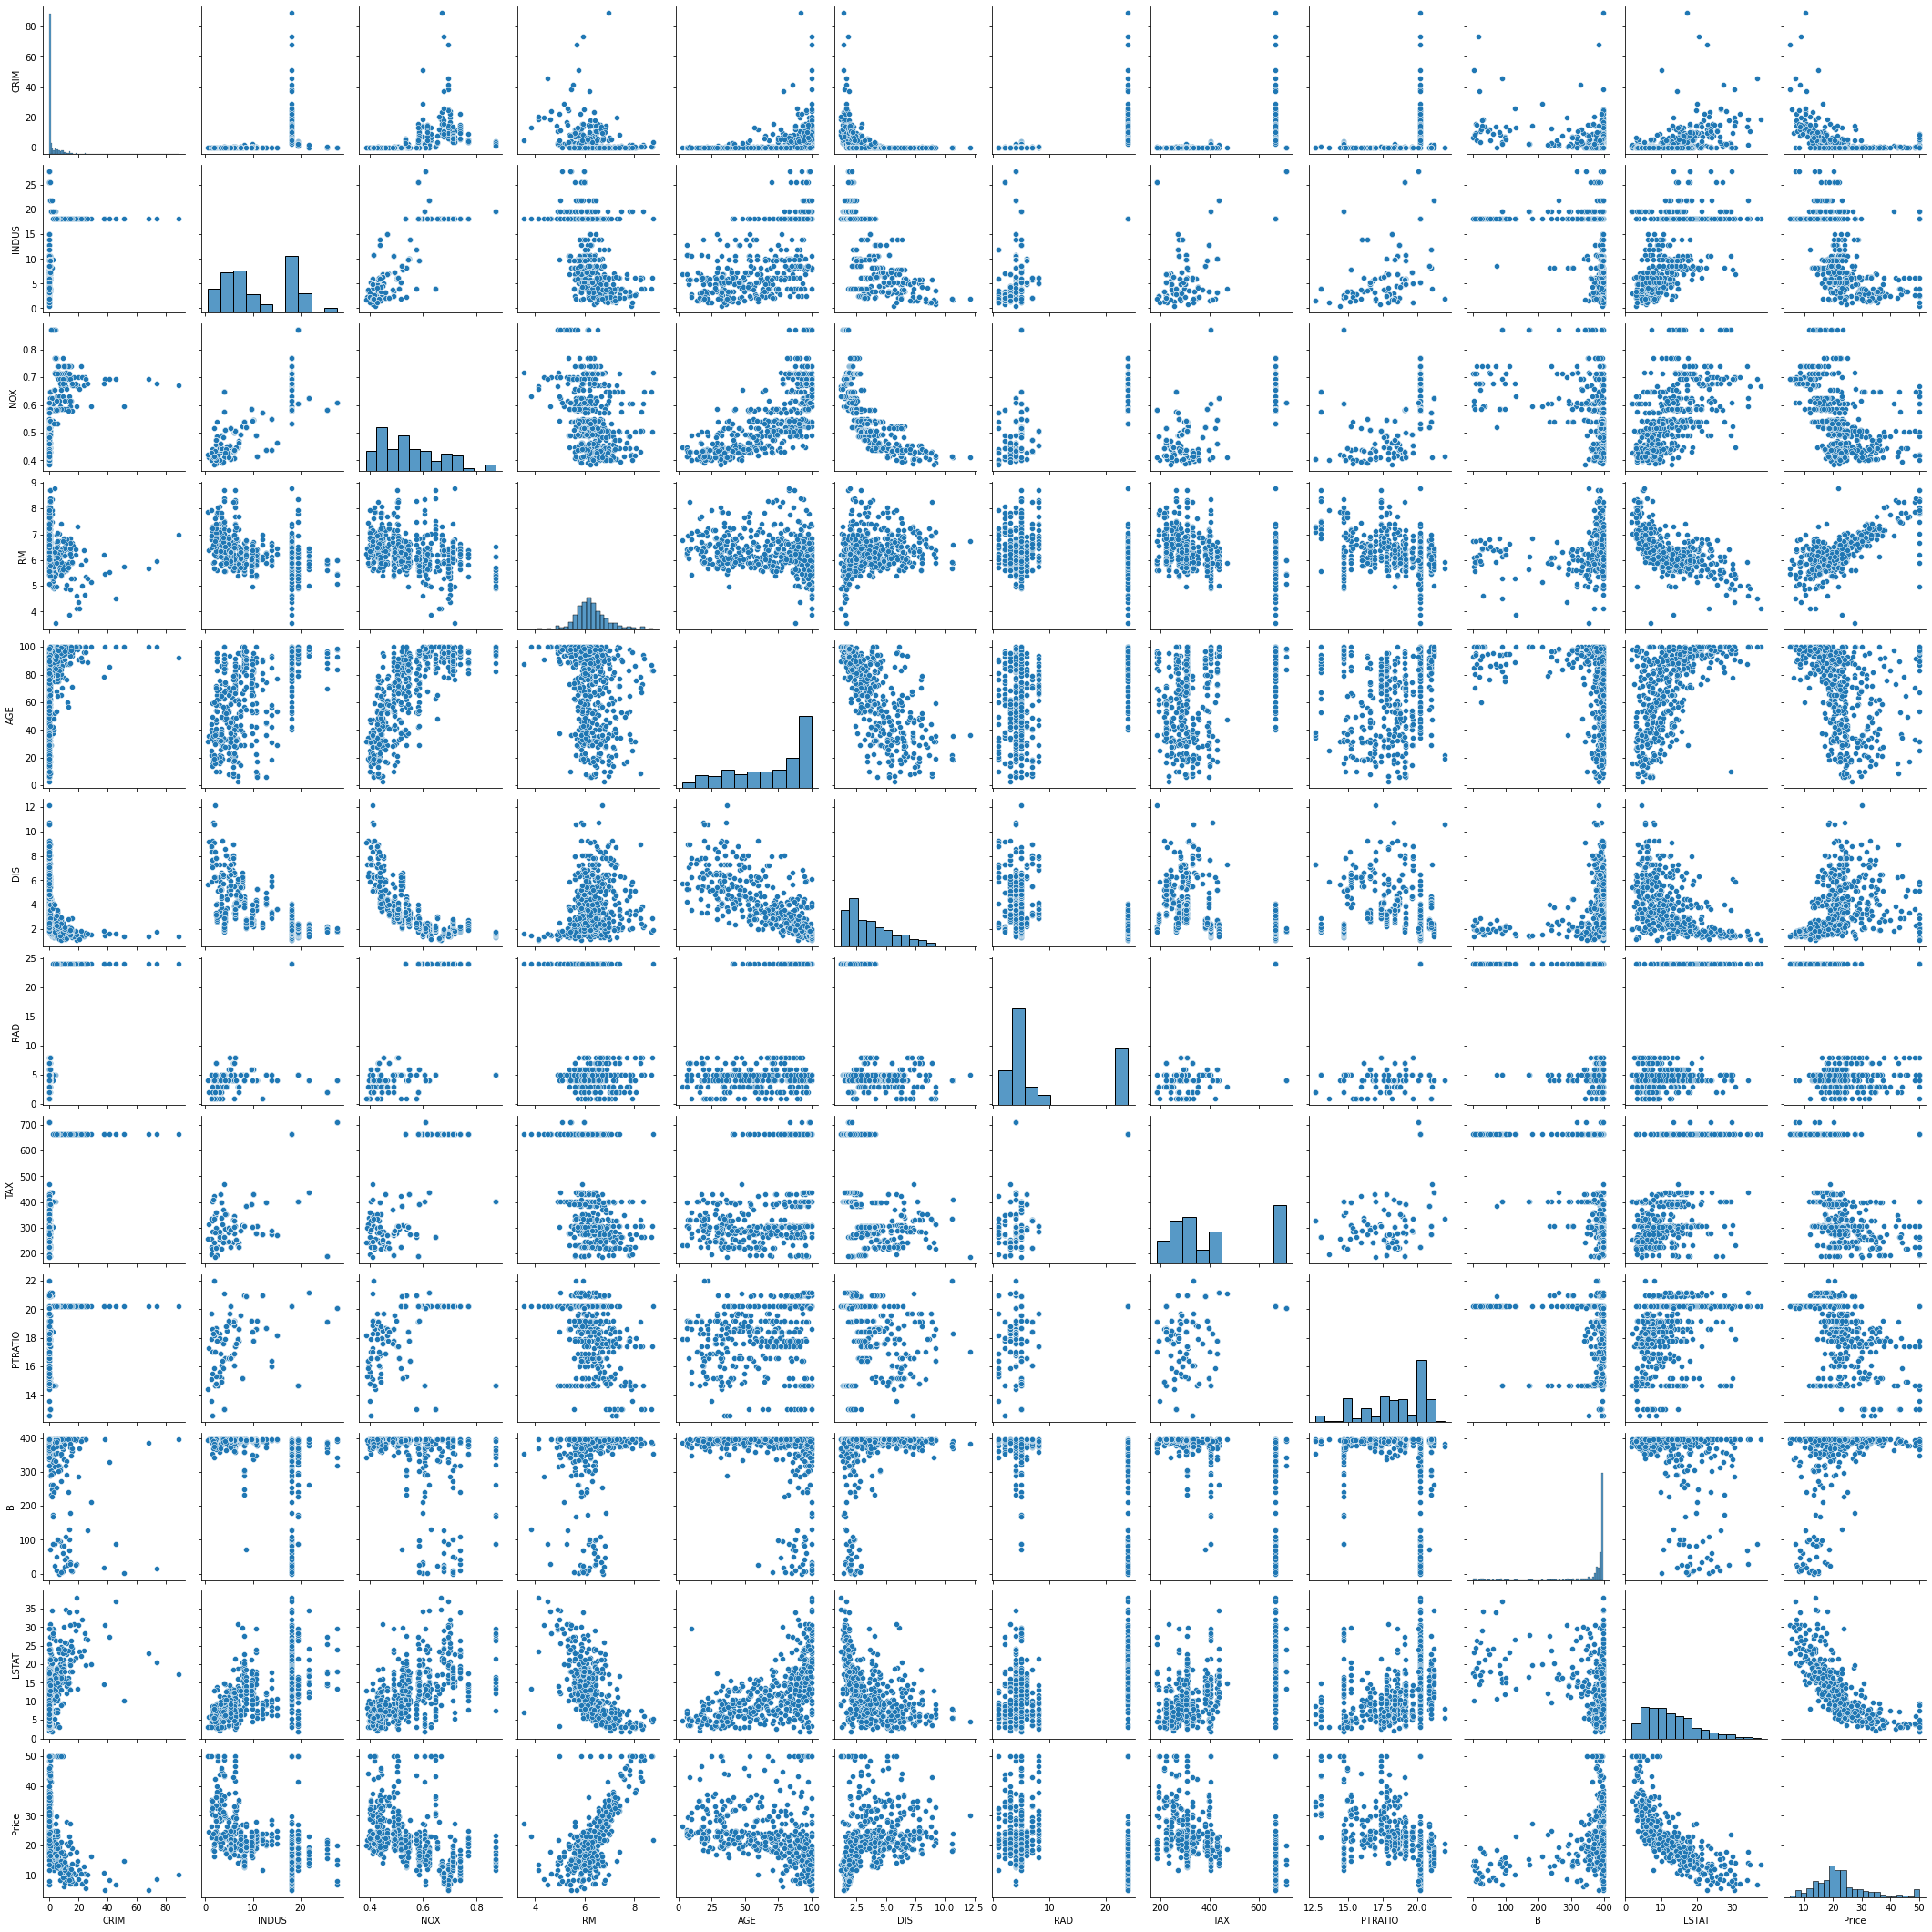

In [12]:
sns.pairplot(dataset)
#to see a correlation between the features using pairplot

Text(0, 0.5, 'Price')

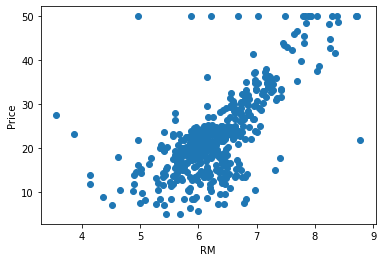

In [13]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<AxesSubplot:xlabel='RM', ylabel='Price'>

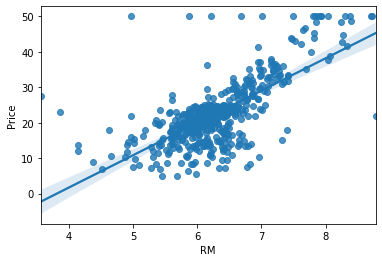

In [14]:
sns.regplot(x="RM",y="Price",data=dataset)

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

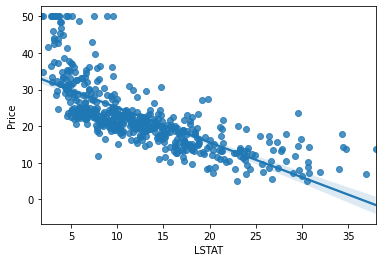

In [15]:
sns.regplot(x="LSTAT",y="Price",data=dataset)
#as the number of room increases, price increases. 

<AxesSubplot:xlabel='PTRATIO', ylabel='Price'>

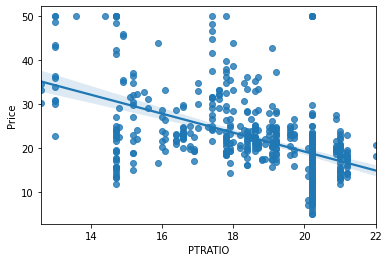

In [16]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)
#as the ratio of pupils to teachers increase, the price decreases

### Checking and Treatment of Outliers

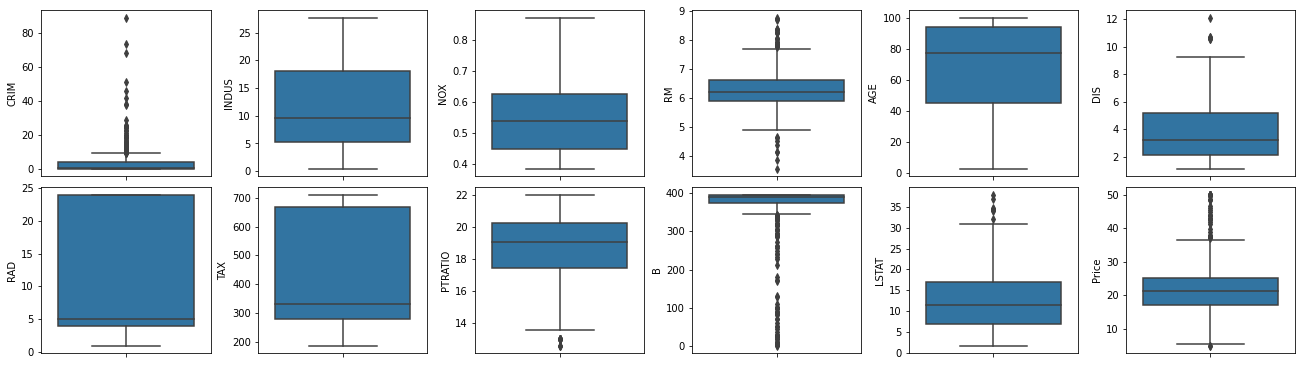

In [17]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(18, 5))
ax = ax.flatten()
n_index = 0
for i in dataset.columns:
  sns.boxplot(y=i,data=dataset, ax=ax[n_index])
  n_index +=1
plt.tight_layout(pad=0.4)
plt.show()
    
    

#### Criteria to identify outliers.

1.Data points that fall outside of 1.5 times the interquartile range.

2.Data points that fall outside of 3 standard deviations, we can use a z score and if the z score falls outside of 2 standard deviations.

#### Impacts of having outliers
1.It causes various problems during statistical analysis
2.It may cause a significant impact on the mean and the standard deviation


#### Ways of finding outlier.
1.Using scatterplots
2.Box Plot
3.using Z Score
4.using the Interquartile range

#### Method for treating outliers
We will be using interquartile range method for this project.

1.To find the percentile, we have to sort the data points in increasing order.

2.Calculate 1st and 3rd quarter.

3.Finding the interquartile range, 3rd quartile - 1st quartile

4.Find the lower and upper bound. Q1* 1.5 , Q3* 1.5

5.Remove anything that lies outside the bounds as an outlier. 

5.Run a loop for all the columns.



In [18]:
#running a loop to detect the number of outliers
for i in dataset.columns:
    dataset.sort_values(by=i,ascending=True,na_position='last')
    q1 = np.nanpercentile(dataset[i],25)
    q3 = np.nanpercentile(dataset[i],75)
    iq_range = q3 - q1
    upper_bound = q3+(iq_range*1.5)
    lower_bound = q1-(iq_range*1.5)
    outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)]
    percentage = (outlier_data.count()/dataset[i].count())*100
    print(f"{round(percentage,2)}% of the data in {i} are outliers, with a count of {outlier_data.count()}")
   
    

13.04% of the data in CRIM are outliers, with a count of 66
0.0% of the data in INDUS are outliers, with a count of 0
0.0% of the data in NOX are outliers, with a count of 0
5.93% of the data in RM are outliers, with a count of 30
0.0% of the data in AGE are outliers, with a count of 0
0.99% of the data in DIS are outliers, with a count of 5
0.0% of the data in RAD are outliers, with a count of 0
0.0% of the data in TAX are outliers, with a count of 0
2.96% of the data in PTRATIO are outliers, with a count of 15
15.22% of the data in B are outliers, with a count of 77
1.38% of the data in LSTAT are outliers, with a count of 7
7.91% of the data in Price are outliers, with a count of 40


'CRIM' and 'B' has a notable percentage of outliers which can negatively affect the accuracy of the model.

There are some method we can take to treat such high percentage of outliers.

1.We can drop such outliers and impute mean or median, but due to the high number of outlier data,
we will be imputing "mean" or "mediam " to a high number of data, this might cause negatively affect the data. 

2.We can drop the extreme outliers and impute "mean" or "median" for them. Extreme outliers are
data points that are more extreme than Q1-(IQ_range* 3) or Q3+(IQ_range* 3).



In [19]:
for i in dataset['CRIM']:
    dataset['CRIM'].sort_values(ascending=True,na_position='last')
    crim_q1 = np.nanpercentile(dataset['CRIM'],25)
    crim_q3 = np.nanpercentile(dataset['CRIM'],75)
    crim_iq_range = q3-q1
    crim_extreme_lower_bound = q1-(crim_iq_range*3)
    crim_extreme_upper_bound = q3+(crim_iq_range*3)
    
for i in dataset['B']:
    dataset['B'].sort_values(ascending=True,na_position='last')
    b_q1 = np.nanpercentile(dataset['B'],25)
    b_q3 = np.nanpercentile(dataset['B'],75)
    b_iq_range = q3-q1
    b_extreme_lower_bound = q1-(b_iq_range*3)
    b_extreme_upper_bound = q3+(b_iq_range*3)
    

    

In [20]:
crim_outliers = (dataset['CRIM'] < (crim_extreme_lower_bound)) | (dataset['CRIM'] > (crim_extreme_upper_bound))
b_outliers = (dataset['B'] < (b_extreme_lower_bound)) | (dataset['B'] > (b_extreme_upper_bound))

In [21]:
crim_outliers_vector = (dataset['CRIM'][crim_outliers])
b_outliers_vector = (dataset['B'][b_outliers])

In [22]:
dataset['CRIM'].iloc[crim_outliers_vector.index.values] = dataset['CRIM'].mean()
dataset['B'].iloc[b_outliers_vector.index.values] = dataset['B'].mean()

In [23]:
dataset.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.085633,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,343.288378,12.653063,22.532806
std,6.077511,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,66.106649,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,356.674032,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,356.674032,11.360000,21.200000
75%,3.613524,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,356.674032,16.955000,25.000000
max,45.746100,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,356.674032,37.970000,50.000000


### Checking For Multicollinearity and reducing it


In [24]:
#Separating Independent vs Dependent Features 
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [25]:
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

    Feature        VIF
0      CRIM   3.309784
1     INDUS  14.205539
2       NOX  76.028054
3        RM  72.900370
4       AGE  21.107888
5       DIS  12.009597
6       RAD  16.155734
7       TAX  57.289065
8   PTRATIO  71.236977
9         B  29.231232
10    LSTAT  11.889696


In [26]:

alphas = np.logspace(-4, 4, 100)
lasso = Lasso()
lasso_params = {'alpha': alphas}
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
lasso_grid.fit(X, Y)
lasso_best_alpha = lasso_grid.best_params_['alpha']
print("Lasso Best Alpha:", lasso_best_alpha)



Lasso Best Alpha: 0.24770763559917114



Feature Importances:
    Feature  Lasso_Coefficient
3        RM           3.510055
8   PTRATIO          -0.875130
5       DIS          -0.740002
10    LSTAT          -0.629772
6       RAD           0.208259
1     INDUS          -0.045991
7       TAX          -0.012794
9         B           0.011989
4       AGE          -0.008528
0      CRIM          -0.000000
2       NOX          -0.000000


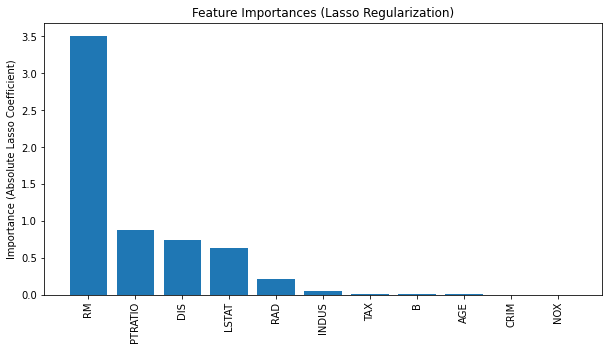

In [27]:


# Assuming you have X and Y defined here

# Apply Lasso regularization to the X and Y variables
lasso = Lasso(alpha=0.24770763559917114)  # alpha to control the strength of regularization
lasso.fit(X, Y)

# Calculate and display Feature Importances
print("\nFeature Importances:")
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Lasso_Coefficient': lasso.coef_})
feature_importances = lasso_coefficients.sort_values(by='Lasso_Coefficient', key=abs, ascending=False)
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 5))
plt.bar(feature_importances['Feature'], feature_importances['Lasso_Coefficient'].abs())
plt.xticks(rotation=90)
plt.ylabel('Importance (Absolute Lasso Coefficient)')
plt.title('Feature Importances (Lasso Regularization)')
plt.show()

### Splitting the data and scaling it.

In [28]:
#Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [29]:
X_train

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
485,3.67367,18.10,0.583,6.312,51.9,3.9917,24,666.0,20.2,356.674032,10.58
275,0.09604,6.41,0.447,6.854,42.8,4.2673,4,254.0,17.6,356.674032,2.98
155,3.53501,19.58,0.871,6.152,82.6,1.7455,5,403.0,14.7,356.674032,15.02
350,0.06211,1.25,0.429,6.490,44.4,8.7921,1,335.0,19.7,356.674032,5.98
119,0.14476,10.01,0.547,5.731,65.2,2.7592,6,432.0,17.8,356.674032,13.61
...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,8.14,0.538,6.142,91.7,3.9769,4,307.0,21.0,356.674032,18.72
72,0.09164,10.81,0.413,6.065,7.8,5.2873,4,305.0,19.2,356.674032,5.52
493,0.17331,9.69,0.585,5.707,54.0,2.3817,6,391.0,19.2,356.674032,12.01
15,0.62739,8.14,0.538,5.834,56.5,4.4986,4,307.0,21.0,356.674032,8.47


In [30]:
#standardizing the dataset
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#transform the dataset to reach global descent and reach globa minima, to ensure
#that all our feature units should be in the same scale.

### Model Training

In [31]:
regression = LinearRegression()
rfr = RandomForestRegressor(random_state=99)
xgboost = XGBRegressor(random_state=99)
knn = KNeighborsRegressor()


In [32]:
lrmodel = regression.fit(X_train,Y_train)
rfr_model = rfr.fit(X_train,Y_train)
xgb_model = xgboost.fit(X_train,Y_train)
knn_model = knn.fit(X_train,Y_train)


In [33]:

#function for calculating RMSE
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

#function for calculating all the relevant metrics
def print_score(m):
    result = [rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test),Y_test),
             m.score(X_train,Y_train),m.score(X_test, Y_test),
             median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
             metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),
             ] 
    
    print("RMSE Train: " + str(result[0])+"\nRMSE Test: "+str(result[1]) +"\nScore Train: "+str(result[2])+ "\nScore Test: "+str(result[3]) +"\nMedAE Train: "+str(result[4])+ "\nMedAE Test: "+str(result[5]) +"\nMeanAE Train: "+str(result[6])+"\nMeanAE Test: "+str(result[7]))

In [34]:
#function to compare the models and their results
def compare_models(models,names,X_train,Y_train,X_test,Y_test): 
    data = {'Metric':['rmse','MedAE','MAE','R-Squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)
    
    def rmse(x,y):
        return math.sqrt(((x-y)**2).mean())
    
    for (model,name) in zip(models,names):
        y_pred = model.predict(X_test)
        result = [rmse(model.predict(X_train),Y_train),rmse(model.predict(X_test),Y_test),
             metrics.median_absolute_error(model.predict(X_train),Y_train),metrics.median_absolute_error(model.predict(X_test),Y_test),
             metrics.mean_absolute_error(model.predict(X_train),Y_train),metrics.mean_absolute_error(model.predict(X_test),Y_test),
             metrics.r2_score(model.predict(X_train),Y_train),metrics.r2_score(model.predict(X_test), Y_test)
             ] 
        df_train[name] = [result[0],result[2],result[4],result[6]]
        df_test[name]= [result[1],result[3],result[5],result[7]]
    return df_train,df_test


In [35]:
models = [lrmodel,rfr_model,xgb_model,knn_model]
names = ['Linear Regression','Random Forest','XGBoost','K-Nearest Ngbr']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

In [36]:
metrics_df = comp_model_test.round(decimals=3)


In [37]:
metrics_df

,Metric,Linear Regression,Random Forest,XGBoost,K-Nearest Ngbr
0,rmse,4.885,3.038,3.279,3.569
1,MedAE,2.722,1.589,1.598,1.760
2,MAE,3.497,2.184,2.248,2.466
3,R-Squared,0.669,0.869,0.858,0.803


In [101]:

rfr_gs = RandomForestRegressor(random_state=99)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

#GridSearchCV object
grid_search = GridSearchCV(
    estimator=rfr_gs,
    param_grid=param_grid,
    cv=3,
    verbose=2,
    n_jobs=-1,
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Evaluate the best model
best_rf_gs = grid_search.best_estimator_
Y_pred_GS = best_rf_gs.predict(X_test)
gs_rmse = rmse(Y_test, Y_pred_GS)
r2_gs = r2_score(Y_test, Y_pred_GS)
mae_gs = metrics.mean_absolute_error(Y_test, Y_pred_GS)
medae_gs = metrics.median_absolute_error(Y_test,Y_pred_GS)

print("Root Mean squared error on the test set:", round(gs_rmse,3))
print("R-Squared Accuracy Score:", round(r2_gs,3))
print("Mean Absolute Error:" , round(mae_gs,3))
print("Median Absolute Error:", round(medae_gs,3))

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits
Best hyperparameters:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Root Mean squared error on the test set: 2.86
R-Squared Accuracy Score: 0.905
Mean Absolute Error: 2.032
Median Absolute Error: 1.55


In [38]:
best_rfr = RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt', 
                                 min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=99)

In [39]:
rfr_gs_model = best_rfr.fit(X_train,Y_train)

In [40]:
models = [lrmodel,rfr_model,xgb_model,knn_model,rfr_gs_model]
names = ['Linear Regression','Random Forest','XGBoost','K-Nearest Ngbr',"Tuned Random Forest"]
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

In [41]:
metrics_df = comp_model_test.round(decimals=3)

In [42]:
metrics_df
#Tuned Random Forest is the best model

,Metric,Linear Regression,Random Forest,XGBoost,K-Nearest Ngbr,Tuned Random Forest
0,rmse,4.885,3.038,3.279,3.569,2.860
1,MedAE,2.722,1.589,1.598,1.760,1.550
2,MAE,3.497,2.184,2.248,2.466,2.032
3,R-Squared,0.669,0.869,0.858,0.803,0.879


##### Actual vs Predicted Values graph

In [43]:
plt.figure(figsize = (8,5))
sns.scatterplot(Y_test,Y_pred_GS,alpha = 0.5,color= 'red',) #actual vs predicted result of the delay
plt.xlabel("Actual Price",fontweight='bold',fontsize= 15)
plt.ylabel("Predicted Price",fontweight='bold',fontsize=15)



NameError: name 'Y_pred_GS' is not defined

<Figure size 576x360 with 0 Axes>

### Predicting New Data

In [44]:
dataset = dataset.drop(columns=["Price"])

In [45]:
dataset.iloc[0].values.reshape(1,-1)

array([[6.32000000e-03, 2.31000000e+00, 5.38000000e-01, 6.57500000e+00,
        6.52000000e+01, 4.09000000e+00, 1.00000000e+00, 2.96000000e+02,
        1.53000000e+01, 3.56674032e+02, 4.98000000e+00]])

In [62]:
new_data = np.array([[1,1,1,1,1,1,1,1,1,1,1]])

In [63]:
new_data_standardized = scaler.transform(new_data)

In [64]:
rfr_gs_model.predict(new_data_standardized)

array([31.0348])

In [113]:
dataset.shape

(506, 11)

### Pickling the model for deployment

In [114]:
import pickle

In [115]:
pickle.dump(rfr_gs_model, open('regmodel.pkl','wb'))

In [116]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [117]:
pickled_model.predict(scaler.transform(dataset.iloc[0].values.reshape(1,-1)))

array([24.])